In [4]:
import matplotlib.pyplot as plt
from view import *

In [5]:
attributions1 = ["t1", "t2"]
durations1 = ["1:10", "0:15"]


attributions2 = ["t1", "t3"]
durations2 = ["0:35", "0:20"]

attributions3=[]
durations3=[]


In [6]:
attributions_lists = []
attributions_lists.append(attributions1)
attributions_lists.append(attributions2)
attributions_lists.append(attributions3)

durations_lists = []
durations_lists.append(durations1)
durations_lists.append(durations2)
durations_lists.append(durations3)
attributions_lists, durations_lists

([['t1', 't2'], ['t1', 't3'], []], [['1:10', '0:15'], ['0:35', '0:20'], []])

In [7]:
def consolidate_attributions_and_durations_lists(attributions_lists, durations_lists):
    all_attributions = []
    all_durations = []

    for att_l_idx, att_list in enumerate(attributions_lists):  # att_l_idx indexes the day corresponding to the attribution list
        for it_idx, it in enumerate(att_list):  # for each item in that attribution list
            try:  # if the current item (it) is already in the all_attribution list
                idx = all_attributions.index(it)
                it_dur = durations_lists[att_l_idx][it_idx]
                all_durations[idx] += str_to_timedelta(it_dur)
#                 print("try", all_attributions, all_durations)
            except ValueError:  #  else
                all_attributions.append(it)
                it_dur = durations_lists[att_l_idx][it_idx]
                all_durations.append(str_to_timedelta(it_dur))
#                 print("except", all_attributions, all_durations)

    return all_attributions, all_durations

consolidate_attributions_and_durations_lists(attributions_lists, durations_lists)

(['t1', 't2', 't3'],
 [datetime.timedelta(seconds=6300),
  datetime.timedelta(seconds=900),
  datetime.timedelta(seconds=1200)])

In [10]:
3600+45*60  # 1h45m

6300

In [30]:
str_input_date = "2021-03-01"
input_date = datetime.datetime.strptime(str_input_date, DATE_FORMAT_YMD).date()
weeks = 1

one_day = timedelta(days=1)
last_monday = input_date + timedelta(days=-input_date.weekday())  # takes the monday before the given date
for w in range(weeks):
    wk_monday = last_monday + timedelta(days=-7*w)
    print("Mon", wk_monday, "- Sun", wk_monday+timedelta(days=+6))
    wk_range = [(wk_monday + i*one_day) for i in range(7)] 

str_wk_range = [str(day) for day in wk_range]
str_wk_range

Mon 2021-03-01 - Sun 2021-03-07


['2021-03-01',
 '2021-03-02',
 '2021-03-03',
 '2021-03-04',
 '2021-03-05',
 '2021-03-06',
 '2021-03-07']

Text(0.5, 1.0, 'Week 2021-03-01 - 2021-03-07: 52.7h logged')

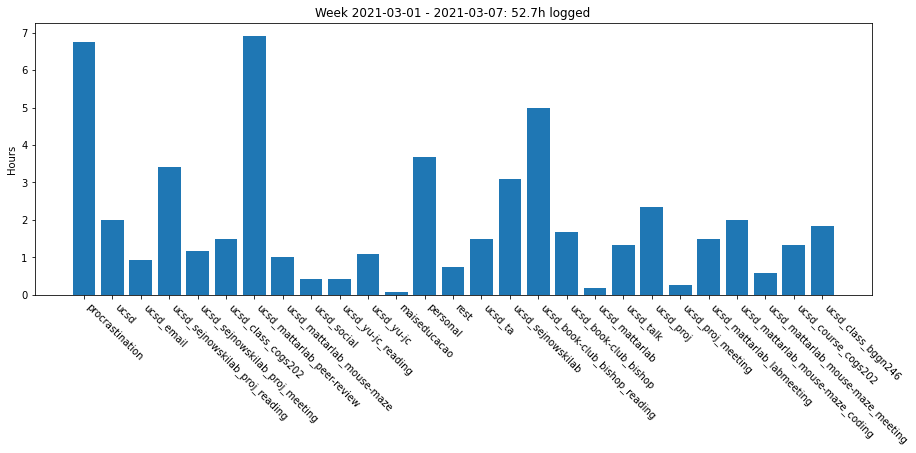

In [92]:
def get_attributions_and_durations(strdate):
    """
    Get attributions and their durations for the given strdate
    strdate: date of the day from which to get the attributions and their durations
    return: attributions list, and a durations list
    """
    try:
        with open(join(JOURNALS_FOLDER, strdate+TXT_FORMAT), 'r', encoding=UTF8_ENCODING) as f:
            daily_journal = f.read().strip()
    except FileNotFoundError as e:
        # if file is not found, return empty lists
        return [],[]

    duration_attribution_list = re.findall('\^T([a-zA-Z0-9_-]+)=(\d?\d:\d\d)', daily_journal)  #TODO: include format 2.5 (for 2.5 hours = 2:30)

    attributions = []
    durations = []                                                                                                                                                                                      
    for item in duration_attribution_list:
        attributions.append(item[0])
        durations.append(item[1])
    
    return attributions, durations

# str_wk_range = ["2020-11-01", "2020-11-02", "2020-11-03", "2020-11-04", "2020-11-05"]

attributions_lists = []
durations_lists = []
for day in str_wk_range:
    attributions, durations = get_attributions_and_durations(day)
    attributions_lists.append(attributions)
    durations_lists.append(durations)
atts, durs = consolidate_attributions_and_durations_lists(attributions_lists, durations_lists)
int_durs = array([dur.seconds/3600 for dur in durs])

plt.figure(figsize=(15,5))
plt.bar(range(len(int_durs)), int_durs, tick_label=atts)
plt.xticks(rotation=-45, ha="left");
plt.ylabel("Hours")
str_monday = str_wk_range[0]
str_sunday = str_wk_range[-1]
plt.title("Week %s - %s: %.1fh logged" % (str_monday, str_sunday, sum(int_durs)))

In [93]:
sum(int_durs)

52.66666666666667

In [94]:
len(atts), atts, int_durs

(27,
 ['procrastination',
  'ucsd',
  'ucsd_email',
  'ucsd_sejnowskilab_proj_reading',
  'ucsd_sejnowskilab_proj_meeting',
  'ucsd_class_cogs202',
  'ucsd_mattarlab_peer-review',
  'ucsd_mattarlab_mouse-maze',
  'ucsd_social',
  'ucsd_yu-jc_reading',
  'ucsd_yu-jc',
  'maiseducacao',
  'personal',
  'rest',
  'ucsd_ta',
  'ucsd_sejnowskilab',
  'ucsd_book-club_bishop_reading',
  'ucsd_book-club_bishop',
  'ucsd_mattarlab',
  'ucsd_talk',
  'ucsd_proj',
  'ucsd_proj_meeting',
  'ucsd_mattarlab_labmeeting',
  'ucsd_mattarlab_mouse-maze_coding',
  'ucsd_mattarlab_mouse-maze_meeting',
  'ucsd_course_cogs202',
  'ucsd_class_bggn246'],
 array([6.75      , 2.        , 0.91666667, 3.41666667, 1.16666667,
        1.5       , 6.91666667, 1.        , 0.41666667, 0.41666667,
        1.08333333, 0.08333333, 3.66666667, 0.75      , 1.5       ,
        3.08333333, 5.        , 1.66666667, 0.16666667, 1.33333333,
        2.33333333, 0.25      , 1.5       , 2.        , 0.58333333,
        1.33333333, 1

## Aggregate plot

In [89]:
tags = ["ucsd_proj", "ucsd_mattarlab_mouse-maze", "ucsd_sejnowskilab",  # research
          "ucsd_class", "ucsd_course", "ucsd_book-club", "ucsd_yu-jc", "ucsd_talk"  # courses
          "ucsd_admin", "ucsd_email", "ucsd_ta", "ucsd_tech",  # bureaucracy
          "sideways-investigation",
          "rest", 
          "personal", "procrastination", "maiseducacao"]  # non-productive
tags

['ucsd_proj',
 'ucsd_mattarlab_mouse-maze',
 'ucsd_sejnowskilab',
 'ucsd_class',
 'ucsd_course',
 'ucsd_book-club',
 'ucsd_yu-jc',
 'ucsd_talkucsd_admin',
 'ucsd_email',
 'ucsd_ta',
 'ucsd_tech',
 'sideways-investigation',
 'rest',
 'personal',
 'procrastination',
 'maiseducacao']

ucsd_proj
ucsd_mattarlab_mouse-maze
ucsd_sejnowskilab
ucsd_class
ucsd_course
ucsd_book-club
ucsd_yu-jc
ucsd_talkucsd_admin
ucsd_email
ucsd_ta
ucsd_tech
sideways-investigation
rest
personal
procrastination
maiseducacao
['ucsd', 'ucsd_mattarlab_peer-review', 'ucsd_social', 'ucsd_mattarlab', 'ucsd_mattarlab_labmeeting']
[2.0, 6.916666666666667, 0.4166666666666667, 0.16666666666666666, 1.5]


Text(0.5, 1.0, 'Week 2021-03-01 - 2021-03-07')

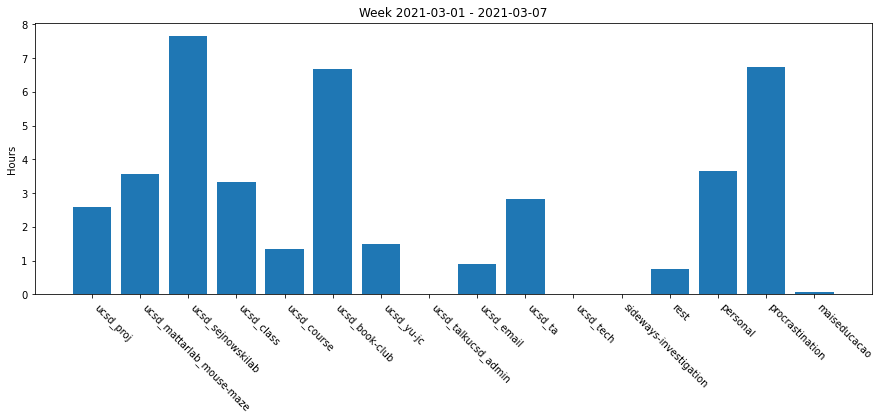

In [100]:
import re
# tag = "ucsd_class"
#     tag = "mouse-maze"

tag_durs = []
for tag in tags:
    print(tag)
    match_indices = []
    for i_att, att in enumerate(atts):
        match_indices.append(i_att) if re.search(tag, att) else None
    match_indices = array(match_indices)
#     print(match_indices)

    if len(match_indices)>0:
        tag_durs.append(sum(int_durs[match_indices]))
    else:
        tag_durs.append(0)

# others
others = []
others_durs = []
for i_att, att in enumerate(atts):
    no_matching_tag = True
    for tag in tags:  # check if there is a tag that matches the current attribution
        if re.search(tag, att):
            no_matching_tag = False
    if no_matching_tag:
        others.append(att)
        others_durs.append(int_durs[i_att])

print(others)
print(others_durs)
        
  
# match_indices#, tag_durs
plt.figure(figsize=(15,5))
plt.bar(range(len(tag_durs)), [dur for dur in tag_durs], tick_label=tags)
plt.xticks(rotation=-45, ha="left");
plt.ylabel("Hours")
str_monday = str_wk_range[0]
str_sunday = str_wk_range[-1]
plt.title("Week %s - %s" % (str_monday, str_sunday))

In [80]:
sum(tag_durs)

41.66666666666667

# Hierarchical plot

In [41]:
# l = zeros(len(atts), "str")
lvl_1 = []
for i_att, att in enumerate(atts):
    print(att.split('_')[0])
    lvl_1.append(att.split('_')[0])
#     l[i_att] = att.split('_')[0]
    
indices = [i for i, x in enumerate(lvl_1) if x == "ucsd"]  # get all attributions indices for which the 1st level is ucsd

sum(array(durs)[array(indices)])  # sum the durations for the chosen indices


procrastination
ucsd
ucsd
ucsd
ucsd
ucsd
ucsd
ucsd
ucsd
ucsd
ucsd
maiseducacao
personal
rest
ucsd
ucsd
ucsd
ucsd
ucsd
ucsd
ucsd
ucsd
ucsd
ucsd
ucsd
ucsd
ucsd


datetime.timedelta(days=1, seconds=62700)